# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

**Dataset:** Africa Malaria and Health Indicators Dataset

- Contains malaria incidence, health interventions, and sanitation data across African countries
- 594 observations across 27 features
- Includes missing values and non-numeric columns (Country Name, Country Code, geometry)
- Relevant for public health analysis in Africa

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

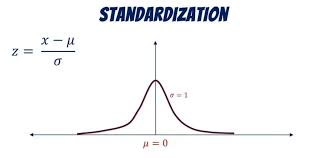


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

df = pd.read_csv("DatasetAfricaMalaria.csv")
numeric_df = df.select_dtypes(include=[np.number]) # Select only columns with numeric data types
numeric_df = numeric_df.fillna(numeric_df.mean()) # Fill any missing values (NaN) in each numeric column with the mean of that column

mean = np.mean(numeric_df.values, axis=0)
std = np.std(numeric_df.values, axis=0)

standardized_data = (numeric_df.values - mean) / std  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
standardized_data[:5]  # Display the first few rows of standardized data

array([[-1.58113883e+00, -1.21256459e+00, -5.06760222e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.55710122e-16,  0.00000000e+00,  5.41893472e-16,
        -1.20335604e+00,  1.84377536e+00, -1.45712868e+00,
        -1.23400095e+00, -1.66809102e+00,  1.23397271e+00,
        -5.61646882e-01,  1.49495110e+00,  1.86242385e+00,
         1.15800583e+00,  1.77365688e+00,  2.08348956e+00,
         1.99788845e+00,  1.60900436e+00, -7.83191277e-01],
       [-1.58113883e+00,  6.16449417e-01,  2.20650663e-01,
        -2.59139328e+00, -4.70762105e-02, -2.59441287e+00,
        -6.55710122e-16,  0.00000000e+00,  5.41893472e-16,
         0.00000000e+00, -1.17007624e-15,  0.00000000e+00,
        -7.98503589e-01,  4.36548583e-01,  7.98470288e-01,
         1.02714839e+00, -1.04968763e+00, -1.49943184e+00,
        -2.03128810e+00, -8.45063064e-02, -6.00246444e-01,
         2.98713596e-01, -8.95720879e-01,  2.65347191e-02],
       [-1.58113883e+00,  1.85097486e+00, -5.06772555e

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [4]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
cov_matrix

array([[ 1.00168634e+00, -6.80542806e-02,  3.57947203e-01,
         2.33223297e-01, -1.83047706e-02,  1.75372178e-01,
         3.65843539e-02,  6.59681612e-02,  2.73071409e-02,
         3.84413217e-02,  9.46769860e-02,  2.67796335e-02,
        -8.40379544e-02, -4.97357957e-02,  8.40398632e-02,
        -5.65317141e-02,  1.18565745e-01,  1.10879038e-01,
         1.00777429e-01,  6.83801684e-02,  6.84030302e-02,
         5.87010243e-02, -9.12704426e-19,  5.24219978e-18],
       [-6.80542806e-02,  1.00168634e+00,  2.88995393e-01,
         4.30348950e-03,  2.29939995e-01,  6.06777508e-02,
        -1.75492561e-01, -1.69633937e-01, -3.72772114e-01,
        -2.07579206e-01, -9.71252108e-02, -1.62720237e-01,
         2.45446793e-01,  3.87139217e-01, -2.45450290e-01,
         3.09619690e-01, -3.68912526e-01, -3.13484257e-01,
        -3.99015433e-01, -4.40983873e-01, -3.75800980e-01,
        -4.25948448e-01,  5.88013289e-02, -2.64875225e-01],
       [ 3.57947203e-01,  2.88995393e-01,  1.00168634e

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [5]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([7.47866447e+00, 2.23494453e+00, 2.04877421e+00, 1.77596923e+00,
        1.46507889e+00, 1.28042481e+00, 1.17147431e+00, 1.01911332e+00,
        8.90113383e-01, 7.57789569e-01, 6.66562869e-01, 6.49614679e-01,
        6.01745519e-01, 4.36829542e-01, 3.78377003e-01, 3.19286817e-01,
        3.12818609e-02, 6.26864578e-03, 1.05297883e-08, 9.60916442e-02,
        1.26540049e-01, 2.12741241e-01, 2.20070925e-01, 1.72714643e-01]),
 array([[ 3.69977278e-02, -3.39660398e-02, -8.15203111e-02,
         -4.38452126e-01, -2.31139912e-01, -2.70373410e-01,
          1.76222096e-01,  3.32017402e-01,  2.68976109e-01,
          2.30068338e-01, -3.03743364e-01, -7.23508005e-02,
         -2.62569133e-01,  4.76759322e-01,  7.54940914e-03,
         -8.39911330e-02,  6.99915103e-03,  2.34107996e-03,
         -5.82182391e-06,  1.27976816e-02,  4.45584131e-02,
          4.78181903e-02, -1.25032098e-02,  2.31131542e-04],
        [-1.89102736e-01, -1.68268507e-01, -2.09474999e-01,
         -5.99710339e-02,

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

Explained variance is used in PCA by telling us how much information (variance) is retained by each principal component. It is what helps us decide how many principal components to keep for dimensionality reduction while preserving most of the information in the data.

In [8]:
# Step 5: Sort Principal Components

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices] # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices] # Sort eigenvectors accordingly

explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
explained_variance_ratio

array([3.11086422e-01, 9.29659167e-02, 8.52218791e-02, 7.38741409e-02,
       6.09421845e-02, 5.32612172e-02, 4.87292554e-02, 4.23915683e-02,
       3.70256198e-02, 3.15214095e-02, 2.77266962e-02, 2.70217105e-02,
       2.50305200e-02, 1.81705891e-02, 1.57391669e-02, 1.32812207e-02,
       9.15418482e-03, 8.84929544e-03, 7.18432822e-03, 5.26362578e-03,
       3.99707807e-03, 1.30121657e-03, 2.60753855e-04, 4.38002556e-10])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [9]:
# Step 6: Project Data onto Principal Components

num_components = np.cumsum(explained_variance_ratio)  # Decide on the number of principal components to keep
num_components = np.argmax(cumulative_variance >= 0.95) + 1
num_components

np.int64(15)

In [11]:
principal_components = sorted_eigenvectors[:, :num_components]
reduced_data = np.dot(standardized_data, principal_components) # Project data onto the principal components
reduced_data[:5]

array([[ 4.22525811, -1.9622283 ,  2.24984972, -0.38749381,  0.43053691,
         2.38324007,  0.39397177, -0.16940471, -1.66842721,  0.24253881,
         0.27861449, -0.60831191,  0.60776882, -1.00887117,  0.53887451],
       [-1.54423135, -0.47672866,  0.32876327,  3.46372508,  0.72387603,
        -0.44455782,  2.69229049, -1.32807757,  0.43673194,  0.52181183,
         1.07902057, -0.19665126, -0.26839598,  0.23469906, -0.38396388],
       [-1.78083426, -1.08796635, -0.7715882 ,  1.19742021,  0.2377475 ,
         0.88271836, -0.77992688, -0.68517593,  0.38392486, -0.86225423,
         0.28610567,  1.17650849,  0.48934755,  0.01016111, -0.21869501],
       [ 2.86128444,  0.17608171,  2.14168675,  0.82906946, -0.04660428,
        -1.37053427, -0.59448648, -1.39348563, -0.47428867, -1.46431395,
         1.67574811, -1.08959029, -0.23667376, -0.19413301,  0.58994108],
       [-2.52840042, -0.48298968, -1.22026901,  1.29716707, -0.38609518,
         1.56553552, -0.51839394, -0.68485408, 

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [12]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (594, 15)


array([[ 4.22525811, -1.9622283 ,  2.24984972, -0.38749381,  0.43053691,
         2.38324007,  0.39397177, -0.16940471, -1.66842721,  0.24253881,
         0.27861449, -0.60831191,  0.60776882, -1.00887117,  0.53887451],
       [-1.54423135, -0.47672866,  0.32876327,  3.46372508,  0.72387603,
        -0.44455782,  2.69229049, -1.32807757,  0.43673194,  0.52181183,
         1.07902057, -0.19665126, -0.26839598,  0.23469906, -0.38396388],
       [-1.78083426, -1.08796635, -0.7715882 ,  1.19742021,  0.2377475 ,
         0.88271836, -0.77992688, -0.68517593,  0.38392486, -0.86225423,
         0.28610567,  1.17650849,  0.48934755,  0.01016111, -0.21869501],
       [ 2.86128444,  0.17608171,  2.14168675,  0.82906946, -0.04660428,
        -1.37053427, -0.59448648, -1.39348563, -0.47428867, -1.46431395,
         1.67574811, -1.08959029, -0.23667376, -0.19413301,  0.58994108],
       [-2.52840042, -0.48298968, -1.22026901,  1.29716707, -0.38609518,
         1.56553552, -0.51839394, -0.68485408, 

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

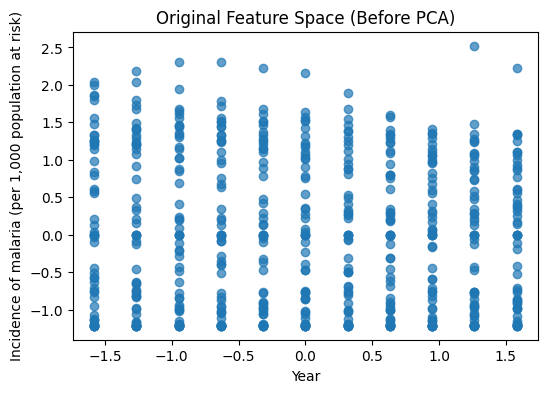

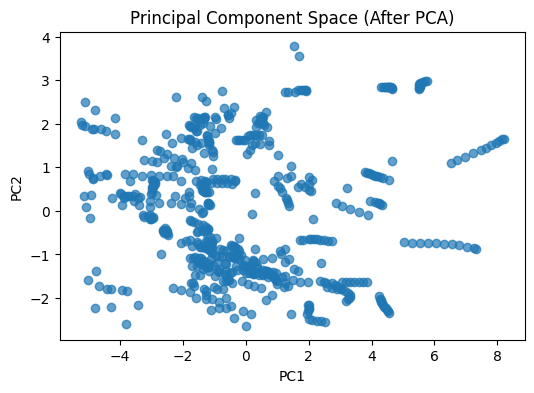

In [13]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)
plt.figure(figsize=(6,4))
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.7)
plt.xlabel(numeric_df.columns[0])
plt.ylabel(numeric_df.columns[1])
plt.title("Original Feature Space (Before PCA)")
plt.show()

# Plot reduced data after PCA
plt.figure(figsize=(6,4))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal Component Space (After PCA)")
plt.show()

PCA Visualization Explanation

- Before PCA, the data exists in the original feature space where correlations between features may be present.
After PCA, the data is transformed into a new coordinate system defined by orthogonal principal components.
PC1 captures the highest variance, followed by PC2.
The structure of the data is preserved but rotated, showing dimensionality reduction while retaining most variance.